<a href="https://colab.research.google.com/github/UdayBytess/ML2LAB/blob/main/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=e9e46b6189b473b6c3797ee06292107daeb6bd6bdcb0452256e97d24f80e8637
  Stored in directory: /root/.cache/pip/wheels/0f/8c/a4/5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom


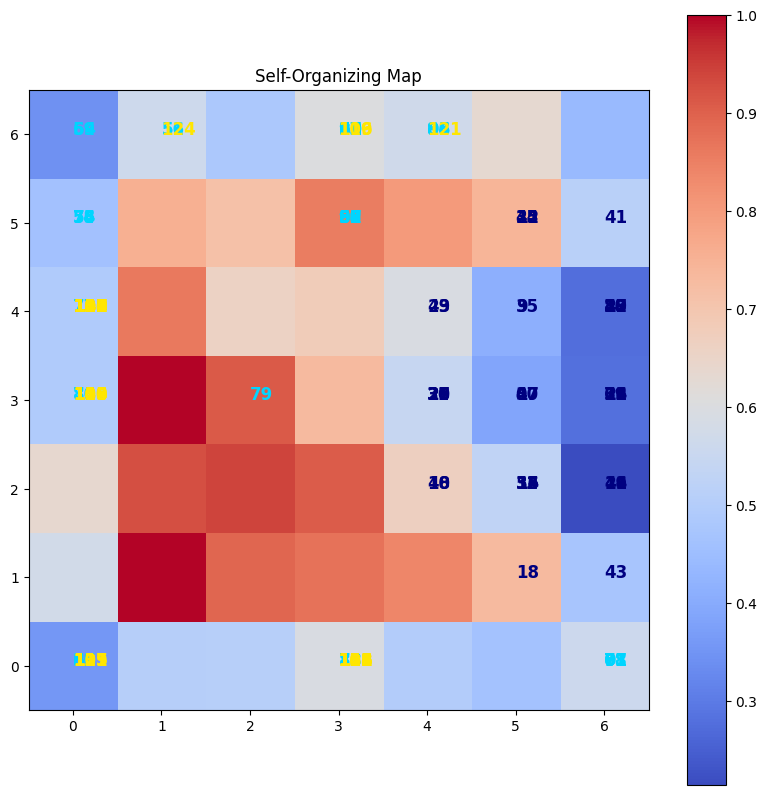

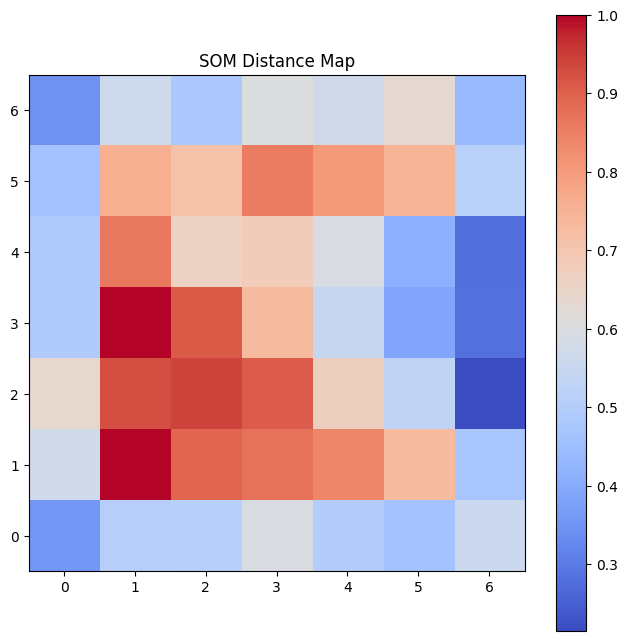

Best Matching Units (BMUs) for each data point:
 [[5 3]
 [5 5]
 [6 4]
 [6 4]
 [5 3]
 [5 2]
 [6 3]
 [6 3]
 [6 4]
 [5 4]
 [4 2]
 [6 3]
 [5 5]
 [6 4]
 [5 2]
 [5 2]
 [5 2]
 [5 3]
 [5 1]
 [6 2]
 [4 3]
 [6 2]
 [6 3]
 [4 4]
 [6 3]
 [5 5]
 [6 3]
 [4 3]
 [4 3]
 [6 4]
 [6 4]
 [4 3]
 [5 2]
 [5 2]
 [5 5]
 [5 4]
 [4 3]
 [5 3]
 [6 4]
 [6 3]
 [5 3]
 [6 5]
 [6 4]
 [6 1]
 [6 2]
 [5 5]
 [6 2]
 [6 4]
 [4 2]
 [4 4]
 [0 0]
 [1 6]
 [0 0]
 [3 6]
 [0 5]
 [3 5]
 [1 6]
 [3 6]
 [0 5]
 [0 6]
 [3 6]
 [6 0]
 [3 6]
 [6 0]
 [0 6]
 [0 0]
 [4 6]
 [3 5]
 [3 6]
 [3 6]
 [0 3]
 [6 0]
 [3 0]
 [3 0]
 [0 5]
 [0 5]
 [0 5]
 [0 4]
 [6 0]
 [2 3]
 [3 6]
 [3 6]
 [3 5]
 [3 0]
 [4 6]
 [0 3]
 [0 0]
 [3 6]
 [4 6]
 [3 6]
 [3 5]
 [6 0]
 [3 5]
 [3 6]
 [3 5]
 [4 6]
 [4 6]
 [6 0]
 [3 6]
 [3 5]
 [0 3]
 [3 0]
 [0 4]
 [0 4]
 [0 4]
 [0 0]
 [3 6]
 [0 4]
 [3 0]
 [0 3]
 [0 3]
 [3 0]
 [0 4]
 [3 0]
 [0 4]
 [0 3]
 [0 4]
 [0 0]
 [0 4]
 [3 6]
 [0 4]
 [4 6]
 [0 4]
 [3 0]
 [1 6]
 [0 0]
 [3 0]
 [0 4]
 [0 4]
 [0 0]
 [0 4]
 [0 0]
 [0 4]
 [3 0]
 [3 0]
 [0 0]

In [2]:
!pip install minisom


import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Step 1: Load and preprocess the dataset (Iris dataset in this case)
data = load_iris()
X = data.data  # The feature set
y = data.target  # The target labels (optional, we won't use these in unsupervised learning)

# Standardize the dataset (important for SOM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Define the size of the SOM grid and the initialization parameters
som_size = 7  # You can adjust the grid size
som = MiniSom(som_size, som_size, X_scaled.shape[1], sigma=1.0, learning_rate=0.5)

# Step 3: Train the SOM
som.train(X_scaled, 100)  # Train for 100 iterations

# Step 4: Visualize the SOM
# Create a 2D grid for plotting
plt.figure(figsize=(10, 10))
plt.title('Self-Organizing Map')
for i, x in enumerate(X_scaled):
    # Find the best matching unit (BMU)
    w = som.winner(x)
    plt.text(w[0], w[1], str(i), color=plt.cm.jet(y[i] / 3), fontweight='bold', fontsize=12)

# Show the plot
plt.imshow(som.distance_map().T, cmap='coolwarm', origin='lower')
plt.colorbar()
plt.show()

# Step 5: Analyzing the result - Visualize the BMUs
# We can use the following for clustering visualization:
# Color the SOM grid based on the distances between neurons
plt.figure(figsize=(8, 8))
plt.imshow(som.distance_map().T, cmap='coolwarm', origin='lower')
plt.colorbar()
plt.title('SOM Distance Map')
plt.show()

# Optional: Output cluster indices (BMU positions for each data point)
bmus = np.array([som.winner(x) for x in X_scaled])
print("Best Matching Units (BMUs) for each data point:\n", bmus)
